# First Name:Richard
# Last Name:Setiawan

In [1]:
import pandas as pd
import numpy as np
import scipy.stats  #I usually keep scipy as scipy because you will need to access it libraries separately. 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#read in csv file into 
nesarc = pd.read_csv('nesarc.csv', low_memory=False) #increase efficiency
pd.set_option('display.float_format', lambda x:'%f'%x)

In [4]:
#setting variables you will be working with to numeric
nesarc['S2AQ5B'] = pd.to_numeric(nesarc['S2AQ5B'], errors='coerce') #convert variable to numeric
nesarc['S2AQ5D'] = pd.to_numeric(nesarc['S2AQ5D'], errors='coerce') #convert variable to numeric
nesarc['S2AQ5A'] = pd.to_numeric(nesarc['S2AQ5A'], errors='coerce') #convert variable to numeric
nesarc['S2BQ1B1'] = pd.to_numeric(nesarc['S2BQ1B1'], errors='coerce') #convert variable to numeric
nesarc['AGE'] = pd.to_numeric(nesarc['AGE'], errors='coerce') #convert variable to numeric

In [5]:
#subset data to adults age 26 to 50 who have consumed beer in the past 12 months
sub1=nesarc[(nesarc['AGE']>=26) & (nesarc['AGE']<=50) & (nesarc['S2AQ5A']==1)]

In [6]:
sub2=sub1.copy()

In [7]:
#SETTING MISSING DATA
sub2['S2AQ5D']=sub2['S2AQ5D'].replace(99, np.nan)

sub2['S2AQ5B']=sub2['S2AQ5B'].replace(8, np.nan)
sub2['S2AQ5B']=sub2['S2AQ5B'].replace(9, np.nan)
sub2['S2AQ5B']=sub2['S2AQ5B'].replace(10, np.nan)
sub2['S2AQ5B']=sub2['S2AQ5B'].replace(99, np.nan)

sub2['S2BQ1B1']=sub2['S2BQ1B1'].replace(9, np.nan)

In [8]:
#recoding number of days consumed beer in the past month
recode2 = {1:30, 2:26, 3:14, 4:8, 5:4, 6:2.5, 7:1}
sub2['BEER_FEQMO']= sub2['S2AQ5B'].map(recode2)

recode3 = {2:0, 1:1}
sub2['S2BQ1B1']= sub2['S2BQ1B1'].map(recode3)

# contingency table of observed counts - between beer dependence (S2BQ1B1) and beer drinking frequency  (BEER_FEQMO)
# Use sub2

In [10]:
ct1= pd.crosstab(sub2['S2BQ1B1'], sub2['BEER_FEQMO'])
print (ct1) 

BEER_FEQMO  1.000000   2.500000   4.000000   8.000000   14.000000  26.000000  \
S2BQ1B1                                                                        
0.000000         1172       1477       1390       1189        842        313   
1.000000           40         80         82        114         78         51   

BEER_FEQMO  30.000000  
S2BQ1B1                
0.000000          343  
1.000000           65  


# contingency table of observed percentages - between beer dependence (S2BQ1B1) and beer drinking frequency  (BEER_FEQMO)
# Use ct1 calculated in the above cell

In [11]:
colsum= ct1.sum(axis=0)
colpct= ct1/colsum
print(colpct)

BEER_FEQMO  1.000000   2.500000   4.000000   8.000000   14.000000  26.000000  \
S2BQ1B1                                                                        
0.000000     0.966997   0.948619   0.944293   0.912510   0.915217   0.859890   
1.000000     0.033003   0.051381   0.055707   0.087490   0.084783   0.140110   

BEER_FEQMO  30.000000  
S2BQ1B1                
0.000000     0.840686  
1.000000     0.159314  


# chi-square analysis between beer dependence (S2BQ1B1) and beer drinking frequency  (BEER_FEQMO)
# Use ct1 

In [12]:
print ('chi-square value, p value, expected counts')
cs1= scipy.stats.chi2_contingency(ct1)
print (cs1)

chi-square value, p value, expected counts
(124.26789738394885, 2.0662068579068e-24, 6, array([[1126.57711443, 1447.26119403, 1368.25207297, 1211.16334992,
         855.15754561,  338.34494196,  379.24378109],
       [  85.42288557,  109.73880597,  103.74792703,   91.83665008,
          64.84245439,   25.65505804,   28.75621891]]))


# Bar plot to show relationship between beer dependence (S2BQ1B1) and beer drinking frequency (BEER_FEQMO)

<IPython.core.display.Javascript object>


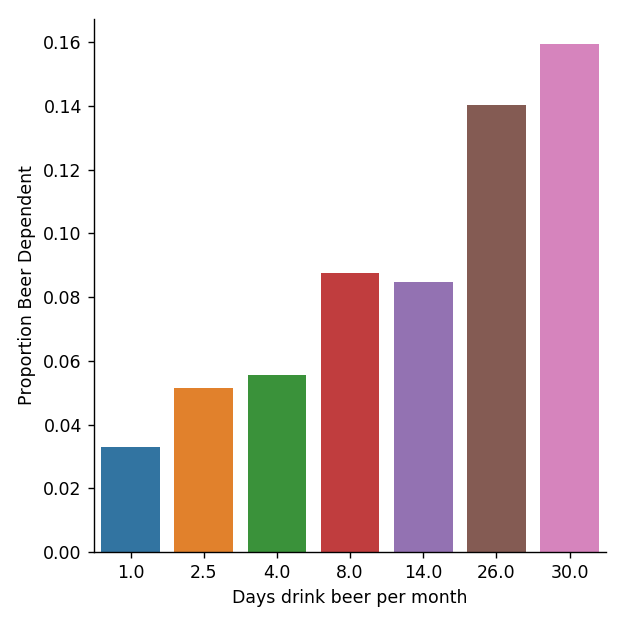

Text(0.5694444444444446, 0.5, 'Proportion Beer Dependent')

In [14]:
%matplotlib notebook
sns.factorplot(x="BEER_FEQMO",y="S2BQ1B1", data=sub2, kind="bar",ci=None)
plt.xlabel('Days drink beer per month')
plt.ylabel('Proportion Beer Dependent')

# Post-hoc analysis
# Compare drinking beer once a month with drinking beer 2.5 days a mont

In [15]:
recode2 = {1: 1, 2.5: 2.5}
sub2['COMP1v2']= sub2['BEER_FEQMO'].map(recode2)

In [16]:
# contingency table of observed counts
ct2=pd.crosstab(sub2['S2BQ1B1'],sub2['COMP1v2'])
print (ct2)

COMP1v2   1.000000  2.500000
S2BQ1B1                     
0.000000      1172      1477
1.000000        40        80


In [17]:
# column percentages
colsum= ct2.sum(axis=0)
colpct=ct2/colsum
print(colpct)

COMP1v2   1.000000  2.500000
S2BQ1B1                     
0.000000  0.966997  0.948619
1.000000  0.033003  0.051381


In [19]:
print ('chi-square value, p value, expected counts')
cs2= scipy.stats.chi2_contingency(ct2)
print (cs2)

chi-square value, p value, expected counts
(5.117284954394778, 0.02368865151946301, 1, array([[1159.47562297, 1489.52437703],
       [  52.52437703,   67.47562297]]))


# Post-hoc Analysis - Concise Code

In [20]:
sub3=sub2.copy()
cat = [1,2.5,4,8,14,26,30]

for x in range(0,len(cat)-1):
    for y in range(x+1,len(cat)):
        recode = {cat[x]:cat[x], cat[y]:cat[y]}
        
        sub3['temp'] = sub3['BEER_FEQMO'].map(recode)
        cont=pd.crosstab(sub3['S2BQ1B1'], sub3['temp'])
        
        cs= scipy.stats.chi2_contingency(cont)
        print("\n", cat[x], " versus ", cat[y],
              "Chi value: ", cs[0], "\tp value: ", cs[1])


 1  versus  2.5 Chi value:  5.117284954394778 	p value:  0.02368865151946301

 1  versus  4 Chi value:  7.38180981335711 	p value:  0.0065886834719099405

 1  versus  8 Chi value:  31.48970835900156 	p value:  2.005001332565289e-08

 1  versus  14 Chi value:  25.83816724108996 	p value:  3.712737501612299e-07

 1  versus  26 Chi value:  57.071272116947235 	p value:  4.2030056044577174e-14

 1  versus  30 Chi value:  78.27380780760498 	p value:  8.97034162448021e-19

 2.5  versus  4 Chi value:  0.20075529654634663 	p value:  0.654111881912749

 2.5  versus  8 Chi value:  14.062375089161176 	p value:  0.0001768463156004476

 2.5  versus  14 Chi value:  10.251876070135845 	p value:  0.0013654566479902833

 2.5  versus  26 Chi value:  35.170103284504975 	p value:  3.0212634599168697e-09

 2.5  versus  30 Chi value:  53.53562719393847 	p value:  2.5394550918301754e-13

 4  versus  8 Chi value:  10.158373116033038 	p value:  0.0014364732738924846

 4  versus  14 Chi value:  7.20979992719534